In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None
#warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)
from library.sb_utils import save_file
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

from collections import Counter
from imblearn.over_sampling import SMOTE 

from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import f1_score, accuracy_score,mean_squared_error,roc_curve,roc_auc_score

from numpy import arange
from numpy import argmax

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('../raw_data/DM_df.csv')

In [3]:
df.shape

(68629, 17)

In [4]:
id_types = df[['admission_type_id',
       'discharge_disposition_id', 'admission_source_id']].astype(str) #to object type

non_id = df[['race', 'gender', 'age','time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_diagnoses', 'change', 'diabetesMed', 'ndiag_1', 'ndiag_2','ndiag_3',
        'readmit']]

df = pd.concat([id_types,non_id], axis=1)

In [5]:
to_standard = df[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
               'number_diagnoses']]

normalized = (to_standard-to_standard.min())/(to_standard.max()-to_standard.min())

standardized_arr = StandardScaler().fit_transform(to_standard)
standardized_df = pd.DataFrame(standardized_arr,columns =['time_in_hospital', 'num_lab_procedures', 
                                                           'num_procedures', 'num_medications','number_diagnoses'])


# Fto_standard = df[['num_lab_procedures','num_procedures','number_diagnoses']]

# Fnormalized = (Fto_standard-Fto_standard.min())/(Fto_standard.max()-Fto_standard.min())

# Fstandardized_arr = preprocessing.StandardScaler().fit(Fto_standard).transform(Fto_standard)
# Fstandardized_df=pd.DataFrame(Fstandardized_arr,columns=['num_lab_procedures','num_procedures','number_diagnoses'])


In [6]:
one_hot = df[['admission_type_id', 'discharge_disposition_id', 'admission_source_id','race', 'gender', 'age',
              'change','diabetesMed', 'ndiag_1', 'ndiag_2','ndiag_3']]
non_one_hot = df[[ 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
               'number_diagnoses']]



raw_df = pd.concat([one_hot, non_one_hot], axis=1)

featured_one_hot = df[['admission_type_id', 'discharge_disposition_id', 'change','diabetesMed', 'age']]
featured_NON_one_hot = df[['num_lab_procedures', 'num_procedures', 'number_diagnoses','time_in_hospital']]



one_hotted = pd.get_dummies(one_hot, drop_first= True)
featured_one_hotted = pd.get_dummies(featured_one_hot, drop_first= True)

df_DM_ns = pd.concat([one_hotted, non_one_hot], axis = 1) #non-standardized/normalized numerical features
df_DM_s = pd.concat([one_hotted, standardized_df], axis = 1) # standardized numerical features
df_DM_n = pd.concat([one_hotted, normalized], axis = 1) #normalized numerical features


# Fdf_DM_ns = pd.concat([featured_one_hotted, featured_NON_one_hot], axis = 1) #non-standardized/normalized numerical features
# Fdf_DM_s = pd.concat([featured_one_hotted, Fstandardized_df], axis = 1) # standardized numerical features
# Fdf_DM_n = pd.concat([featured_one_hotted, Fnormalized], axis = 1) #normalized numerical features

# lg_features_s = df_DM_ns[[ 'admission_type_id_6', 'admission_type_id_7',
#         'discharge_disposition_id_11',
#        'discharge_disposition_id_13', 'discharge_disposition_id_14',
#        'discharge_disposition_id_15', 'discharge_disposition_id_2',
#        'discharge_disposition_id_22', 'discharge_disposition_id_24',
#        'discharge_disposition_id_28', 'discharge_disposition_id_3',
#        'discharge_disposition_id_4', 'discharge_disposition_id_5',
#        'discharge_disposition_id_6', 'discharge_disposition_id_7',
#        'discharge_disposition_id_8', 'admission_source_id_20',
#        'admission_source_id_3', 'admission_source_id_4',
#        'admission_source_id_6', 'admission_source_id_7',
#        'admission_source_id_9', 'race_Asian', 
#        'ndiag_1_Neoplasms']]

# rf_features_s = df_DM_s[['admission_type_id', 'discharge_disposition_id_1',
#        'discharge_disposition_id_3', 'discharge_disposition_id_6',
#        'admission_source_id_7', 'race_AfricanAmerican', 'race_Caucasian',
#        'gender_Female', 'gender_Male', 'age_40-50', 'age_50-60', 'age_60-70',
#        'age_70-80', 'age_80-90', 'change_Ch', 'change_No',
#        'ndiag_1_Circulatory', 'ndiag_1_Digestive', 'ndiag_1_Genitourinary',
#        'ndiag_1_Respiratory', 'ndiag_1_ill-defined', 'ndiag_2_Circulatory',
#        'ndiag_2_DiabetesMellitus(DM)', 'ndiag_2_Endocrine(no DM)',
#        'ndiag_2_Genitourinary', 'ndiag_2_Respiratory', 'time_in_hospital',
#        'num_lab_procedures', 'num_procedures', 'num_medications',
#        'number_diagnoses']]

# xb_features = df_DM_s[['admission_type_id_6', 'discharge_disposition_id_11',
#        'discharge_disposition_id_13', 'discharge_disposition_id_14',
#        'admission_source_id_4', 'diabetesMed_Yes']]

In [7]:
df_DM_ns = df_DM_ns.astype('float64')
df_DM_s = df_DM_s.astype('float64')
df_DM_n = df_DM_n.astype('float64')

# featured_one_hotted = featured_one_hotted.astype('float64')

# rf_features_s = rf_features.astype('float64')
# lg_features_s = lg_features.astype('float64')
# xb_features = xb_features.astype('float64')

In [8]:
df_DM_n.head(8)

,admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,admission_type_id_6,admission_type_id_7,admission_type_id_8,discharge_disposition_id_10,discharge_disposition_id_11,discharge_disposition_id_12,discharge_disposition_id_13,discharge_disposition_id_14,discharge_disposition_id_15,discharge_disposition_id_16,discharge_disposition_id_17,discharge_disposition_id_18,discharge_disposition_id_19,discharge_disposition_id_2,discharge_disposition_id_20,discharge_disposition_id_22,discharge_disposition_id_23,discharge_disposition_id_24,discharge_disposition_id_25,discharge_disposition_id_27,discharge_disposition_id_28,discharge_disposition_id_3,discharge_disposition_id_4,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_7,discharge_disposition_id_8,discharge_disposition_id_9,admission_source_id_10,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_17,admission_source_id_2,admission_source_id_20,admission_source_id_22,admission_source_id_25,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_8,admission_source_id_9,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,age_10-20,age_20-30,age_30-40,age_40-50,age_50-60,age_60-70,age_70-80,age_80-90,age_90-100,change_No,diabetesMed_Yes,ndiag_1_DiabetesMellitus(DM),ndiag_1_Digestive,ndiag_1_Endocrine(no DM),ndiag_1_Genitourinary,ndiag_1_Infection/Parasite,ndiag_1_Injury/Poisoning,ndiag_1_MS/Connective,ndiag_1_Mental,ndiag_1_Neoplasms,ndiag_1_Other,ndiag_1_Respiratory,ndiag_1_Skin/Subcutaneous,ndiag_1_ill-defined,ndiag_2_DiabetesMellitus(DM),ndiag_2_Digestive,ndiag_2_Endocrine(no DM),ndiag_2_Genitourinary,ndiag_2_Infection/Parasite,ndiag_2_Injury/Poisoning,ndiag_2_MS/Connective,ndiag_2_Mental,ndiag_2_Neoplasms,ndiag_2_Other,ndiag_2_Respiratory,ndiag_2_Skin/Subcutaneous,ndiag_2_ill-defined,ndiag_3_DiabetesMellitus(DM),ndiag_3_Digestive,ndiag_3_Endocrine(no DM),ndiag_3_Genitourinary,ndiag_3_Infection/Parasite,ndiag_3_Injury/Poisoning,ndiag_3_MS/Connective,ndiag_3_Mental,ndiag_3_Neoplasms,ndiag_3_Other,ndiag_3_Respiratory,ndiag_3_Skin/Subcutaneous,ndiag_3_ill-defined,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.153846,0.442748,0.000000,0.2125,0.461538
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.076923,0.076336,0.833333,0.1500,0.230769
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.328244,0.166667,0.1875,0.307692
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [9]:
raw_df.head()

,admission_type_id,discharge_disposition_id,admission_source_id,race,gender,age,change,diabetesMed,ndiag_1,ndiag_2,ndiag_3,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses
0,1,1,7,Caucasian,Female,10-20,Ch,Yes,Endocrine(no DM),DiabetesMellitus(DM),Endocrine(no DM),3,59,0,18,9
1,1,1,7,AfricanAmerican,Female,20-30,No,Yes,Genitourinary,DiabetesMellitus(DM),Other,2,11,5,13,6
2,1,1,7,Caucasian,Male,30-40,Ch,Yes,Infection/Parasite,DiabetesMellitus(DM),Circulatory,2,44,1,16,7
3,1,1,7,Caucasian,Male,40-50,Ch,Yes,Neoplasms,Neoplasms,DiabetesMellitus(DM),1,51,0,8,5
4,2,1,2,Caucasian,Male,50-60,No,Yes,Circulatory,Circulatory,DiabetesMellitus(DM),3,31,6,16,9


In [10]:
sm = SMOTE(random_state=42)
X_bal, y_bal = sm.fit_resample(df_DM_n.values, df['readmit'].values)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.3, random_state=42)

In [42]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# #preprocessing.StandardScaler().fit(df_DM_n).transform(df_DM_n)
# y = df['readmit'].to_numpy()
# #y = y.reshape([-1,1])
# print(Counter(y))
# print(X.shape)

In [12]:
print(Counter(y_bal))

Counter({1: 40879, 0: 40879})


In [13]:
#y_bal = y_bal.reshape([-1,1])
X_train.shape

(57230, 108)

## PCA data

In [45]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
pca.n_components_

108

## XGBoostClassifier

In [84]:
%%time
xgb = XGBClassifier(gamma= 3.7,n_jobs=-1,use_label_encoder=False,eval_metric = 'logloss',
                    booster = 'dart', tree_method = 'approx', normalize_type='forest',sample_type='weighted')
#, eval_metric = 'error@0.6'
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print('XGBClassifier training score: ', xgb.score(X_train,y_train))
print('XGBClassifier test score: ', xgb.score(X_test,y_test))
print('mse:', mean_squared_error(y_test, y_pred))

XGBClassifier training score:  0.7209268593393044
XGBClassifier test score:  0.6665961587274727
mse: 0.3334038412725273
CPU times: total: 8min 38s
Wall time: 1min 16s


AUC: 0.7541713631499809


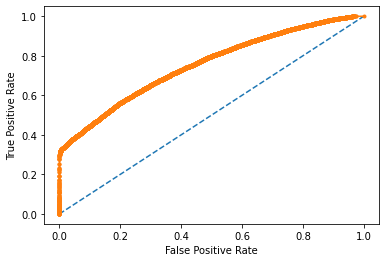

In [16]:
lr_probs = xgb.predict_proba(X_test)
yhat = lr_probs[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, yhat)

plt.plot([0,1], [0,1], linestyle='--', label='Base')
plt.plot(fpr, tpr, marker='.', label='Logistic')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');
print('AUC:',roc_auc_score(y_test, yhat))

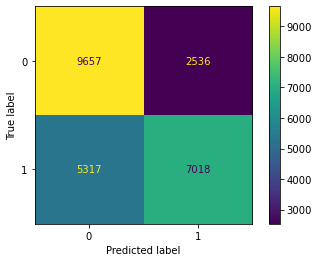

In [17]:
plot_confusion_matrix(xgb, X_test, y_test) 
plt.grid(False)
plt.show()

In [18]:
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.79      0.71     12193
           1       0.73      0.57      0.64     12335

    accuracy                           0.68     24528
   macro avg       0.69      0.68      0.68     24528
weighted avg       0.69      0.68      0.68     24528



**XGB Hyperparameter Tuning**

In [ ]:
gtest_scores = []
gtrain_scores = []

for i in arange(0,21,1):
    
    xgb = XGBClassifier(max_leaves = i, gamma= 3.7,n_jobs=-1,use_label_encoder=False, eval_metric = 'logloss', booster='dart')
    xgb.fit(X_train,y_train)
    
    gtrain_scores.append(xgb.score(X_train,y_train))
    gtest_scores.append(xgb.score(X_test,y_test))

In [ ]:
gammas = arange(0.1,4,0.1)
ix = argmax(gtest_scores)
print('Gamma=%.3f, Score=%.5f' % (gammas[ix], gtest_scores[ix]))

In [ ]:
etas = arange(0.1,1.1,0.1)
ix = argmax(gtest_scores)
print('Eta=%.3f, Score=%.5f' % (etas[ix], gtest_scores[ix]))

In [ ]:
max_depths = arange(0,21,1)
ix = argmax(gtest_scores)
print('maxdepth=%.3f, Score=%.5f' % (max_depths[ix], gtest_scores[ix]))

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(arange(0.1,4,0.1),gtrain_scores,marker='*',label='Train Score')
p = sns.lineplot(arange(0.1,4,0.1),gtest_scores,marker='o',label='Test Score')

## KNeighborsClassifier

In [ ]:
%%time
knn = KNeighborsClassifier(weights='distance', p= 1, n_neighbors= 90, leaf_size= 35,algorithm='kd_tree',n_jobs=-1)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


print('KNN training score: ', knn.score(X_train,y_train))
print('KNN test score: ', knn.score(X_test,y_test))
print('mse:', mean_squared_error(y_test, y_pred))

In [ ]:
lr_probs = knn.predict_proba(X_test)
yhat = lr_probs[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, yhat)

plt.plot([0,1], [0,1], linestyle='--', label='Base')
plt.plot(fpr, tpr, marker='.', label='Logistic')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');
print('AUC:',roc_auc_score(y_test, yhat))

In [ ]:
plot_confusion_matrix(knn, X_test, y_test) 
plt.grid(False)
plt.show()

In [ ]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

**KNN Hyperparameter Tuning**

In [ ]:
estimator_KNN = KNeighborsClassifier()
parameters_KNN = {
    'n_neighbors': arange(50,250,10),
    'leaf_size': arange(30,50,5),
    'p': (1,2),
    'weights': ('uniform','distance'),    
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}
                   

grid_search_KNN = RandomizedSearchCV(
    estimator_KNN,
    parameters_KNN,    
    n_jobs = -1,
    cv = 5
)


grid_search_KNN.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",grid_search_KNN.best_params_)
print("accuracy :",grid_search_KNN.best_score_)

## Randomforest Classifier

In [85]:
%%time
rforest = RandomForestClassifier(n_estimators= 900,max_features='sqrt', criterion = 'entropy',n_jobs=-1)

rforest.fit(X_train, y_train)
y_pred = rforest.predict(X_test)


print('RandomForestClassifier training score: ', rforest.score(X_train,y_train))
print('RandomForestClassifier test score: ', rforest.score(X_test,y_test))
print('mse:', mean_squared_error(y_test, y_pred))

RandomForestClassifier training score:  0.9999818689487616
RandomForestClassifier test score:  0.6742533209239361
mse: 0.32574667907606397
CPU times: total: 6min 33s
Wall time: 57.3 s


AUC: 0.7378478471386977


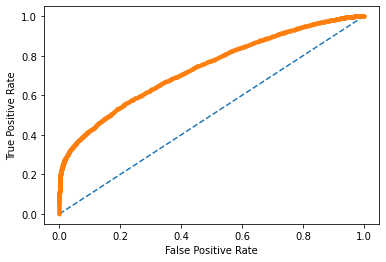

In [125]:
lr_probs = rforest.predict_proba(X_test)
yhat = lr_probs[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, yhat)

plt.plot([0,1], [0,1], linestyle='--', label='Base')
plt.plot(fpr, tpr, marker='.', label='RF')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');
print('AUC:',roc_auc_score(y_test, yhat))

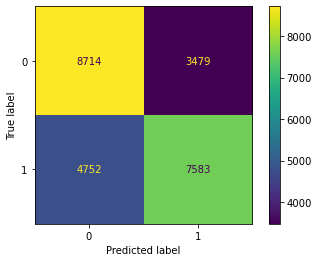

In [126]:
plot_confusion_matrix(rforest, X_test, y_test) 
plt.grid(False)
plt.show()

In [127]:
#y_pred = rforest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68     12193
           1       0.69      0.61      0.65     12335

    accuracy                           0.66     24528
   macro avg       0.67      0.66      0.66     24528
weighted avg       0.67      0.66      0.66     24528



**Randomforest hyper-tuning**

In [ ]:
grid_rf = {'n_estimators': arange(900,1500,100),
           'criterion': ['gini', 'entropy'],          
           'max_features': ['auto','sqrt', 'log2']
          }

rf = RandomForestClassifier()
gs_rndf = RandomizedSearchCV(rf, grid_rf, cv= 5,n_jobs=-1)
gs_rndf.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",gs_rndf.best_params_)
print("accuracy :",gs_rndf.best_score_)

## Bagging KNN


In [ ]:
bagging = BaggingClassifier(KNeighborsClassifier(weights='distance', p= 1, n_neighbors= 90, leaf_size= 35,
                                                 algorithm='kd_tree',n_jobs=-1), n_jobs=-1)
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)


print('baggingKNN training score: ', bagging.score(X_train,y_train))
print('baggingKNN test score: ', bagging.score(X_test,y_test))
print('mse:', mean_squared_error(y_test, y_pred))

In [ ]:
lr_probs = bagging.predict_proba(X_test)
yhat = lr_probs[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, yhat)

plt.plot([0,1], [0,1], linestyle='--', label='Base')
plt.plot(fpr, tpr, marker='.', label='Bagging KNN')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');
print('AUC:',roc_auc_score(y_test, yhat))

In [ ]:
plot_confusion_matrix(bagging, X_test, y_test) 
plt.grid(False)
plt.show()

In [ ]:
#y_pred = rforest.predict(X_test)
print(classification_report(y_test, y_pred))

## ExtraTreesClassifier

In [14]:
%%time
ets = ExtraTreesClassifier(n_estimators= 1600,max_features='log2', criterion = 'gini',n_jobs=-1)

ets.fit(X_train, y_train)
y_pred = ets.predict(X_test)

print('ExtraTreesClassifier training score: ', ets.score(X_train,y_train))
print('ExtraTreesClassifier test score: ', ets.score(X_test,y_test))
print('mse:', mean_squared_error(y_test, y_pred))

ExtraTreesClassifier training score:  0.9999825266468635
ExtraTreesClassifier test score:  0.702136333985649
mse: 0.29786366601435094
CPU times: total: 14min 22s
Wall time: 2min 5s


In [117]:
etest_scores = []
etrain_scores = []

for i in arange(1800,3500,100):
    
    e = ExtraTreesClassifier(n_estimators= i,max_features='log2', criterion = 'gini',n_jobs=-1)
    e.fit(X_train,y_train)
    
    etrain_scores.append(e.score(X_train,y_train))
    etest_scores.append(e.score(X_test,y_test))

In [120]:
ais = arange(100,2000,100)
ix = argmax(etest_scores)
print('i=%.3f, Score=%.5f' % (ais[ix], etest_scores[ix]))

i=1600.000, Score=0.68529


In [116]:
%%time
ets = ExtraTreesClassifier(n_estimators= 1600,max_features='log2', criterion = 'gini',n_jobs=-1)

ets.fit(X_train, y_train)
y_pred = ets.predict(X_test)

print('ExtraTreesClassifier training score: ', ets.score(X_train,y_train))
print('ExtraTreesClassifier test score: ', ets.score(X_test,y_test))
print('mse:', mean_squared_error(y_test, y_pred))

[0.6802605973432608,
 0.6822912259920467,
 0.6820797021744649,
 0.6847449022759963,
 0.6826296641001777,
 0.6842795498773162,
 0.6837718927151197,
 0.6821643117014976,
 0.6824181402825958,
 0.6844064641678653,
 0.6829257974447923,
 0.6831373212623741,
 0.6830950164988577,
 0.6843641594043489,
 0.6845756832219307,
 0.6830950164988577,
 0.6841526355867671,
 0.6848718165665454,
 0.6845756832219307]

AUC: 0.7772241018498224


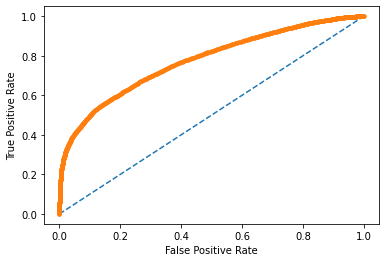

In [15]:
lr_probs = ets.predict_proba(X_test)
yhat = lr_probs[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, yhat)

plt.plot([0,1], [0,1], linestyle='--', label='Base')
plt.plot(fpr, tpr, marker='.', label='Bagging KNN')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');
print('AUC:',roc_auc_score(y_test, yhat))

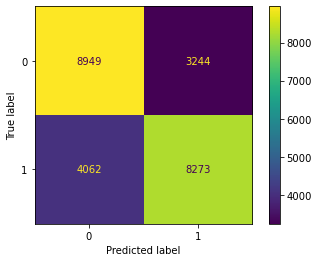

In [16]:
plot_confusion_matrix(ets, X_test, y_test) 
plt.grid(False)
plt.show()

In [17]:
#y_pred = rforest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71     12193
           1       0.72      0.67      0.69     12335

    accuracy                           0.70     24528
   macro avg       0.70      0.70      0.70     24528
weighted avg       0.70      0.70      0.70     24528



**ExtraTreeClassifier Tuning**

In [18]:
grid_ets = {'n_estimators': arange(900,1600,100),
           'criterion': ['gini', 'entropy'],          
           'max_features': ['sqrt']
          }

ets_cv = ExtraTreesClassifier(n_jobs=-1)
RSets_cv = RandomizedSearchCV(ets_cv, grid_ets, cv= 5)
RSets_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",RSets_cv.best_params_)
print("accuracy :",RSets_cv.best_score_)

## AdaBoostClassifier

In [ ]:
%%time
ada = AdaBoostClassifier(n_estimators= 200,algorithm = 'SAMME')

ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)


print('AdaBoostClassifier training score: ', ada.score(X_train,y_train))
print('AdaBoostClassifier test score: ', ada.score(X_test,y_test))
print('mse:', mean_squared_error(y_test, y_pred))

In [30]:
ada_grid = {'n_estimators': arange(50,300,50),
            'algorithm': ['SAMME','SAMME.R'],
            'learning_rate': arange(1,5,1)
                 
             }

grid = RandomizedSearchCV(AdaBoostClassifier(), ada_grid, n_jobs=-1, cv=5)
 

grid.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",grid.best_params_)
print("accuracy :",grid.best_score_)

tuned hpyerparameters :(best parameters)  {'n_estimators': 200, 'learning_rate': 1, 'algorithm': 'SAMME.R'}
accuracy : 0.6575746985846583


In [ ]:
# selector = SelectFromModel(KNeighborsClassifier(n_neighbors = 190,weights='uniform', algorithm='auto', leaf_size=1, p=1, 
#                                metric='minkowski',  n_jobs=-1)).fit(X_train, y_train)

#sel.get_support()
#selected_feat= X_train.columns[(sel.get_support())]
# print(selected_feat)

# LogisticRegression(l1_ratio = 0.1,C = 4, penalty= 'elasticnet', solver= 'saga',  
# #                                          n_jobs=-1,max_iter=200))

In [ ]:
# sel = SelectFromModel(RandomForestClassifier(n_estimators = 900))
# nm= sel.fit(X_train, y_train)
# #sel.get_support()
# #selected_feat= X_train.columns[(sel.get_support())]
# print(selected_feat)

In [ ]:
# sel = SelectFromModel(XGBClassifier(booster='gbtree', colsample_bytree=0.4, gamma=0.2,              
#               learning_rate=0.1, max_depth=6,min_child_weight=7, n_jobs=-1  ))
# sel.fit(X_train, y_train)
# #sel.get_support()
# selected_feat= X_train.columns[(sel.get_support())]
# print(selected_feat)

In [ ]:
# parameters ={'C':[4,5,6,7,15],'penalty':['elasticnet', 'l1', 'l2'], 'solver':['saga'],
#             'l1_ratio': [0.1,0.2,0.4,0.6]}

# lr=LogisticRegression()
# logreg_cv = RandomizedSearchCV(lr, parameters , cv = 10, n_jobs=-1 )
# logreg_cv.fit(X_train, y_train)

# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [ ]:
# def plot_confusion_matrix(y,y_predict):
    
#     from sklearn.metrics import confusion_matrix

#     cm = confusion_matrix(y, y_predict)
#     ax= plt.subplot()
#     sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
#     ax.set_xlabel('Predicted labels')
#     ax.set_ylabel('True labels')
#     ax.set_title('Confusion Matrix'); 
#     ax.xaxis.set_ticklabels(['not admit', 'admit']); ax.yaxis.set_ticklabels(['not admitted', 'admitted'])

# plot_confusion_matrix(y_test, y_pred)